
**Solución:**

Utilicemos una máquina de turing con 4 cintas, con la capacidad adicional de que la cabezas de las cintas se pueden quedar quietas(en la explicación la palabra deje intacta o directamente no mencionarlas es equivalente a lo anterior).

-La primera cinta se utilizará para leer el input.

-La segunda cinta para guardar todos los números desde 2(10 en binario), hasta el antecesor número en binario del input .

-La tercera cinta cumplirá la función auxiliar de copiar la cinta 3, para poder agregar los siguientes símbolos de una longitud mayor, ya explicaré esto y otra función auxiliar que hace esta cinta.

Definamos el alfabeto del input como $\{1,0\}\cup\{\#,-(signo \ blanco)\}$.El signo $\#$ para separar los números entre 2(10 en binario) y el antecesor del input en binario.

**Paso1:** 
De acuerdo a la situación siga uno de los siguientes pasos:

Primero lea el input de la primera cinta con (la cabeza de la primera cinta) de izquierda a derecha(no haga nada con las cabezas de las otras cintas, déjelas quieta hasta que se indique) y siga una de las siguientes clausulas

a)Si hay 1 símbolo acepte solo si es 1(así acepta al 1 que es un primo y no acepta al 0).

b)Si no se cumple a)devuelva-se al inicio de la cinta y elimine los 0's anteriores al primer 1,si quedan 2 símbolos acepte(Esto permite aceptar el 2(en binario 10) y el 3 (11 binario) que son primos.

c)Si no se cumple a) y b) entonces devuelva-se hasta el primer símbolo del input y elimine los 0's anteriores al primer 1,**aquí se empieza a utilizar la segunda cinta,la tercera cinta déjela intacta hasta que se diga lo contrario**, muévase a la derecha y en la cinta 2 escriba el primer símbolo(1 evidentemente), después **deje intacta las demás cintas** y escriba en la segunda cinta el símbolo 10(agregue 0 al 1 que ya está en la cinta),separé por el símbolo $\#$ y escriba 11,generalizando este paso, copie la información a la cinta 3 y lea la cinta 3, pero para cada cadena codificada en la copia de la cinta 3 agrega cadena-0(concatenado 0) y cadena-1(concatenado 1), después de realizar lo anterior para cada cadena de la copia, borra la copia y , pasa al siguiente símbolo del input y por el proceso de copia, escribo las cadenas de longitud k+1, siendo k la longitud de las cadenas anteriores.
Para ejemplificar, si tengo la cadenas de longitud 3, 111,110,101,1000 entonces me surgirán el doble de cadenas, 2 por cada cadena que haya.
Cuando este en el último símbolo del input,agregue el input a la segunda cinta pero con el último símbolo igual a 0(en caso de que el último símbolo del input sea 1) si el último símbolo es cero, deje intactas la cadenas(no agregue nada a la cinta 2)(note que la cinta 3 está vacía) y pase al paso 2

**paso 2**
Para cadena codificada en la cinta 2, sume en binario esta cadena consigo misma(Asumiremos que hay una máquina de turing para esto, esta a su vez tiene los detalles verbales de como opera, por simplicidad se deja al lector la comprobación y demostración de este detalle) y agréguela a la cinta 3.
verifique que la cadena resultante sea menor que el input(Asumiremos que hay una máquina de turing para esto, esta a su vez tiene los detalles verbales de como opera, por simplicidad se deja al lector la comprobación y demostración de este detalle), haga esto hasta que el número resultante sea mayor que el input o igual, si es igual rechaza, si es mayor, borra la cinta 3 y pasa a la siguiente cadena en la cinta 2, el input se acepta si y solo si cada cadena de la cinta 2 se puede sumar consigo misma hasta que el resultado sea mayor que el input.

Como vemos esta máquina para en todo input, si el número es primo(diferente de 2,1,3, ya definimos que estos inputs los acepta) ninguno de los números anteriores(2(10 binario) hasta el número anterior del input) sumados consigo mismo n veces logra ser igual al input(esto es equivalente a decir que este número no es divisible si no solamente entre el input y uno), si no por el contrario mayor al input, así al final acepta. Si el número no es primo entonces algún número entre el rango mencionado logra ser igual al sumarse consigo mismo n veces y rechaza(Lo anterior es equivalente a que existe un número diferente a 1 y al input que divide al input), es decir que es un número no primo.


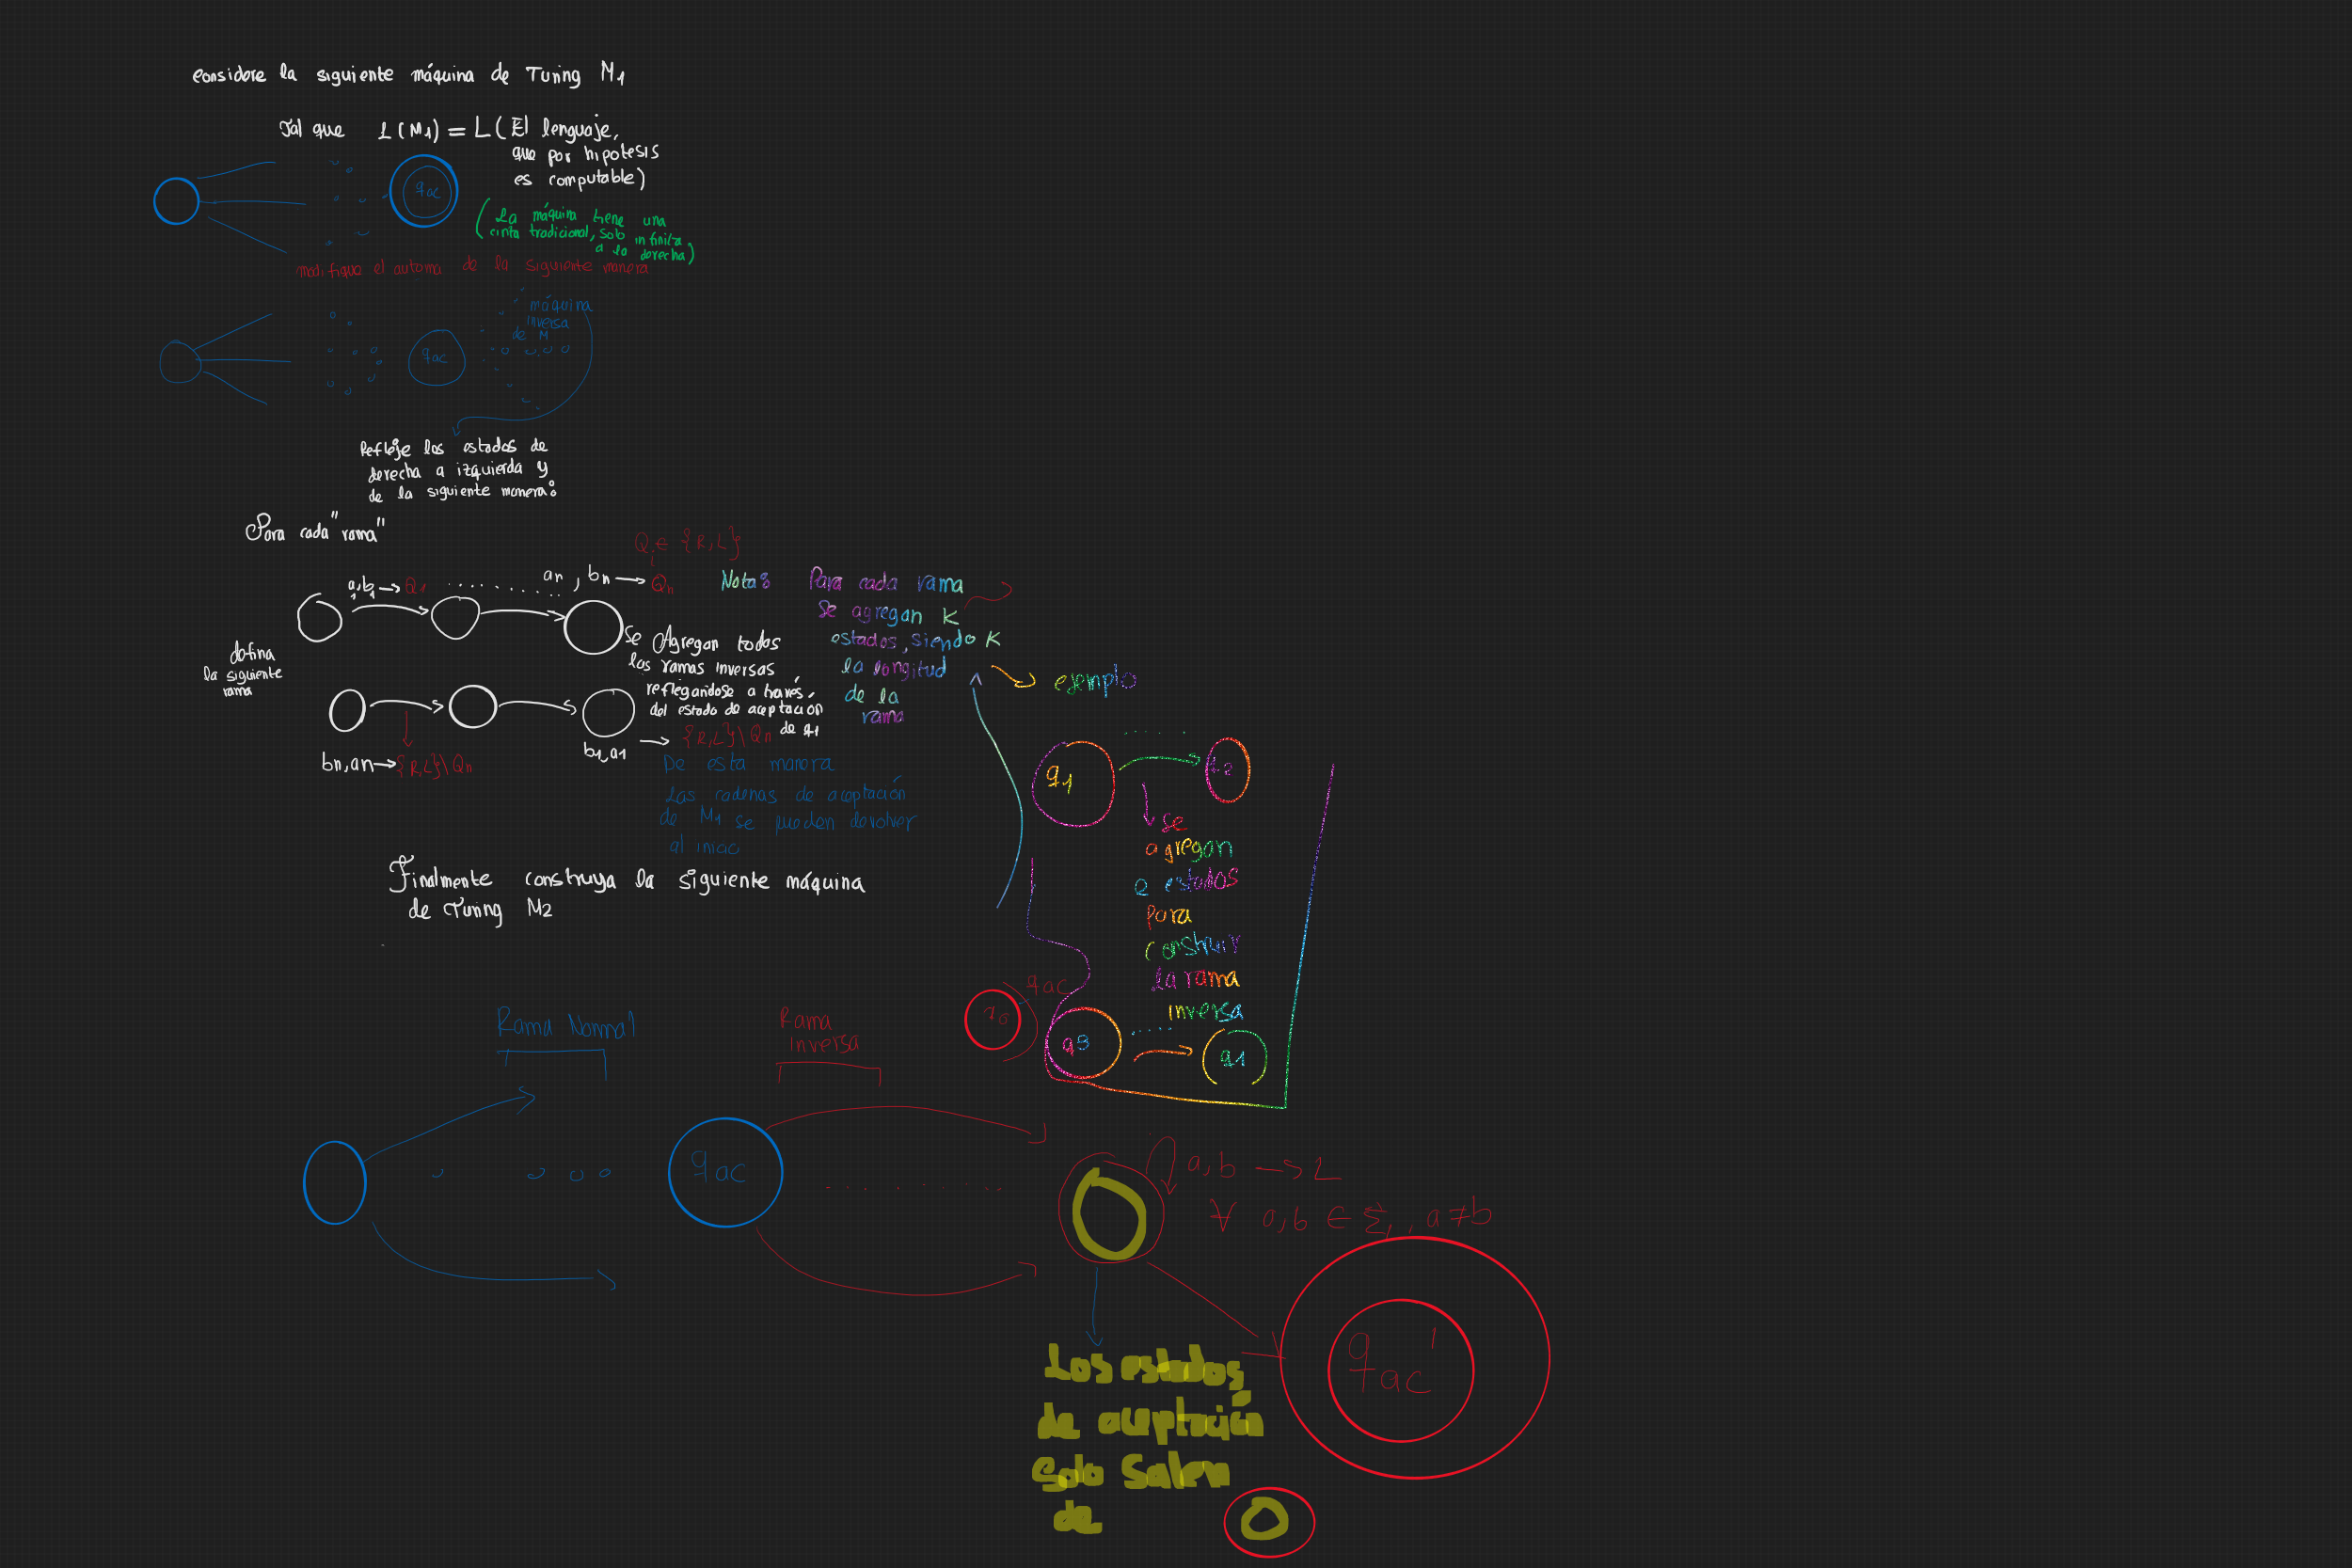

In [2]:
#Cuidado con la sintaxis, es importante que sea igual al ejemplo que está aqui, adicionalmente si al inicio del automáta con pila
# existen transiciones epsilon y se agregan simbolos a la pila, porfavor coloque estos simbolos en initial_stack_symbolos
#adicionalmente el concepto de cambiar en la pila e-simbolo, equivale a colocar todas las reglas simbolo en sigma-simbolo, esto para evitar errores en el programa
# y que solamente se entienda como leer '' a cuando ya no haya simbolos a leer
#quitar en la pila se simboliza por estado,'', adicionar a la pila como simbolo pila: (estado,(simbolo,simbolo pila))
#remplazar simbolos se reconoce como simbolo pila: (estado,simbolo)
# Debido a la las llaves de los diccionarios, si en el mismo estado hay 2 llaves de lectura iguales, ocasionará error,por ende debe
#buscar un automáta con pila no determinista
# Automáta con pila que reconoce 0**n 1**n
from automata.pda.dpda import DPDA
dpda = DPDA(
    states={'q2','q3','q4','q5'},
    input_symbols={'0', '1'},
    stack_symbols={'A', 'B','$'},
    transitions={
#############################################3     
        'q2': {
            '0': {'$': ('q3', ('A', '$'))}  
        },
#############################################3     
        
        'q3': {
            '0': {'A': ('q3', ('A', 'A'))},
            '1': {'A': ('q4', '')}
#############################################3         
        },
        'q4': {
            '1': {'A': ('q4','')},
            '' : {'$':('q5','')}
#############################################3            
        }
    },
    initial_state='q2',
    initial_stack_symbol='$',
    final_states={'q5'},
    acceptance_mode='final_state'
)
#Puedo comprobar el lenguaje de esta máquina
dpda.read_input('00000111111')

PDAConfiguration('q5', '', PDAStack())